In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Read the CSV file into a DataFrame
customers = pd.read_csv('/content/drive/MyDrive/Zeotap/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotap/Products.csv')
transactions= pd.read_csv('/content/drive/MyDrive/Zeotap/Transactions.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
customer.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
product.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transaction.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


### **1. Regional Breakdown of Customer Signups and Transactions**

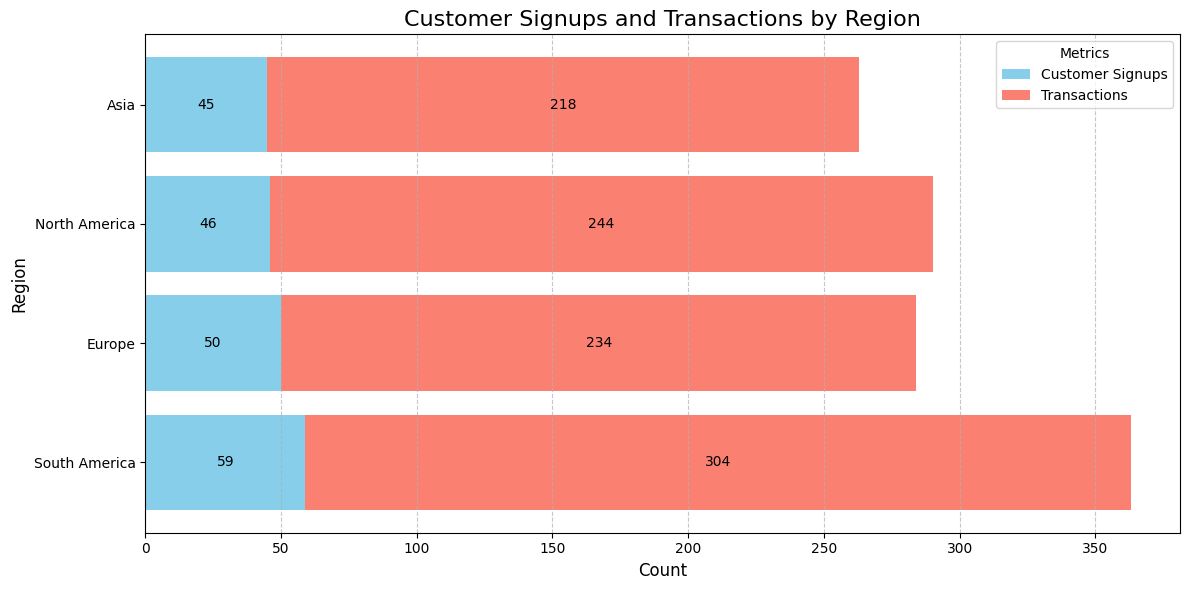

In [17]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# 1. Count customer signups by region
signup_by_region = customers.groupby('Region')['CustomerID'].nunique().reset_index()
signup_by_region = signup_by_region.sort_values(by='CustomerID', ascending=False)

# 2. Count transactions by region
# Merge transactions with customers to get the region info
transactions_with_region = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')
transactions_by_region = transactions_with_region.groupby('Region')['TransactionID'].nunique().reset_index()
transactions_by_region = transactions_by_region.sort_values(by='TransactionID', ascending=False)

# Merge the two DataFrames to compare signups and transactions by region
region_comparison = pd.merge(signup_by_region, transactions_by_region, on='Region', how='left')
region_comparison.columns = ['Region', 'CustomerSignups', 'Transactions']

# Plotting both on the same graph with a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Stacked bar chart: Plotting customer signups and transactions
ax.barh(region_comparison['Region'], region_comparison['CustomerSignups'], color='skyblue', label='Customer Signups')
ax.barh(region_comparison['Region'], region_comparison['Transactions'], left=region_comparison['CustomerSignups'], color='salmon', label='Transactions')

# Adding annotations on top of the bars
for i, row in region_comparison.iterrows():
    ax.text(row['CustomerSignups'] / 2, i, str(row['CustomerSignups']), va='center', ha='center', color='black', fontsize=10)
    ax.text(row['CustomerSignups'] + row['Transactions'] / 2, i, str(row['Transactions']), va='center', ha='center', color='black', fontsize=10)

# Set labels and title
ax.set_title('Customer Signups and Transactions by Region', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Region', fontsize=12)
ax.legend(title='Metrics')

# Enhance appearance with grid lines and tight layout
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


### **2. Sales of Products Across Different Regions**

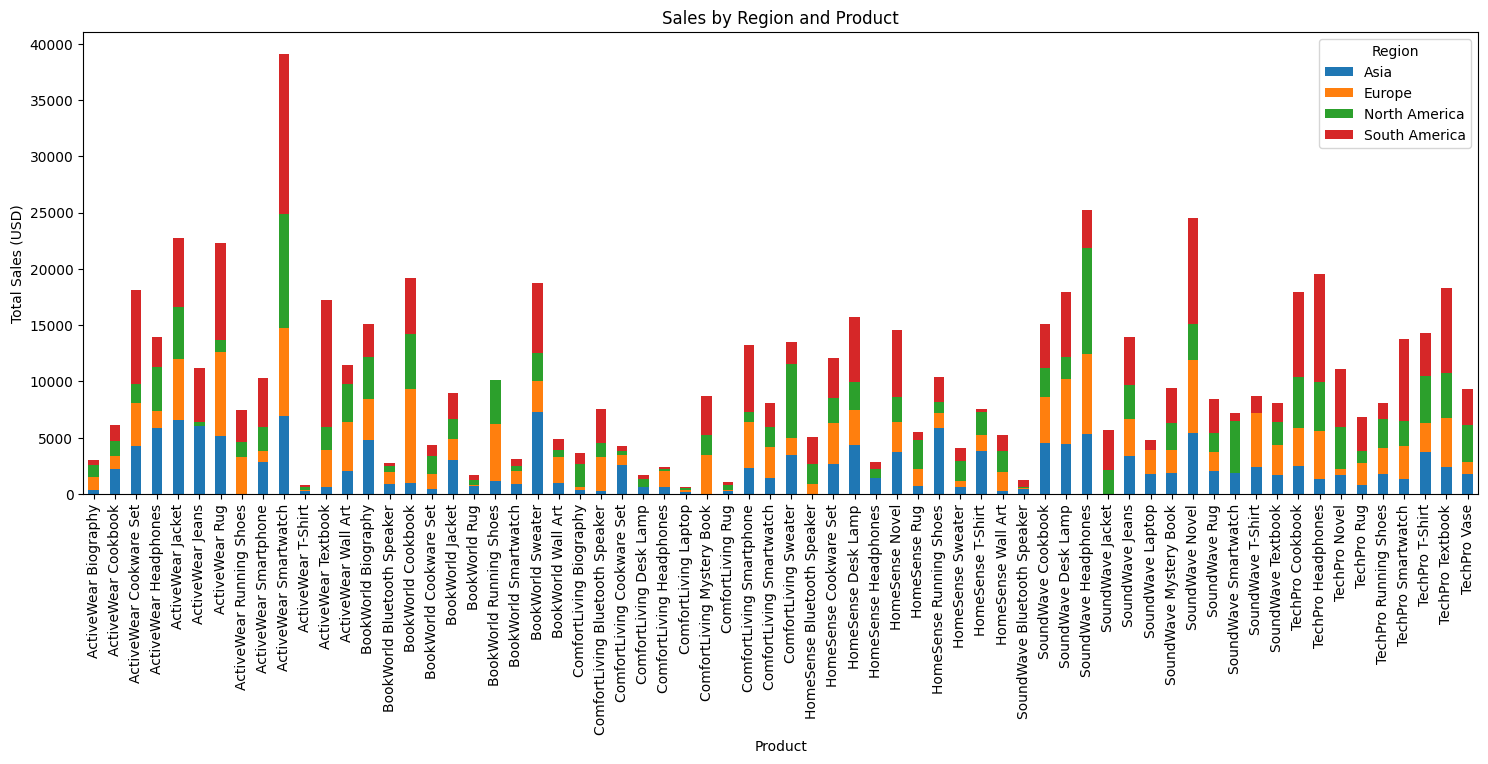

In [19]:
# Merge datasets: join transactions with customers and products to get region and product details
merged_df = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, products, on='ProductID', how='inner')

# Group by Region and ProductName, and sum the TotalValue to calculate the total sales by region and product
sales_by_region_product = merged_df.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()

# Now, you can inspect the sales by region and product
#print(sales_by_region_product)

# Optional: Pivot table to visualize the total sales by region and product for easier comparison
pivot_sales = sales_by_region_product.pivot(index='ProductName', columns='Region', values='TotalValue')
#print(pivot_sales)

# Plotting a bar chart for sales by region and product
pivot_sales.plot(kind='bar', stacked=True, figsize=(18, 6))
plt.title('Sales by Region and Product')
plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.show()


### **3. Customer Lifetime Value (CLV)**

##### 3.1.  Display top 10 high-value customers (CLV)

In [32]:
# Merge transactions with customer data to get customer information (Region, SignupDate, etc.)
merged_df = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Calculate the CLV for each customer by summing the TotalValue of all transactions
clv_df = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()

# Optionally, join this CLV data back with the customer data to get customer details (like Name, Region)
clv_with_details = pd.merge(clv_df, customers_df, on='CustomerID', how='inner')

# Sort customers by CLV to identify high-value customers
clv_with_details = clv_with_details.sort_values(by='TotalValue', ascending=False)

# Display top 10 high-value customers
print(clv_with_details.head(10))

# You can save this result to a CSV or plot the CLV distribution
#clv_with_details.to_csv('Customer_Lifetime_Value.csv', index=False)


    CustomerID  TotalValue          CustomerName         Region SignupDate
140      C0141    10673.87          Paul Parsons         Europe 2023-02-23
53       C0054     8040.39          Bruce Rhodes           Asia 2024-09-29
64       C0065     7663.70          Gerald Hines  North America 2024-07-10
155      C0156     7634.45         William Adams  North America 2023-08-19
81       C0082     7572.91          Aimee Taylor  South America 2022-05-13
186      C0188     7111.32             Anna Ball  South America 2022-05-17
58       C0059     7073.28  Mrs. Kimberly Wright  North America 2024-04-07
27       C0028     6819.57         Jennifer Pena           Asia 2024-06-29
98       C0099     6715.72          Rodney Eaton  South America 2023-01-29
164      C0165     6708.10         Juan Mcdaniel  South America 2022-04-09


##### 3.2.  Customer Value Breakdown Over Their Lifetime

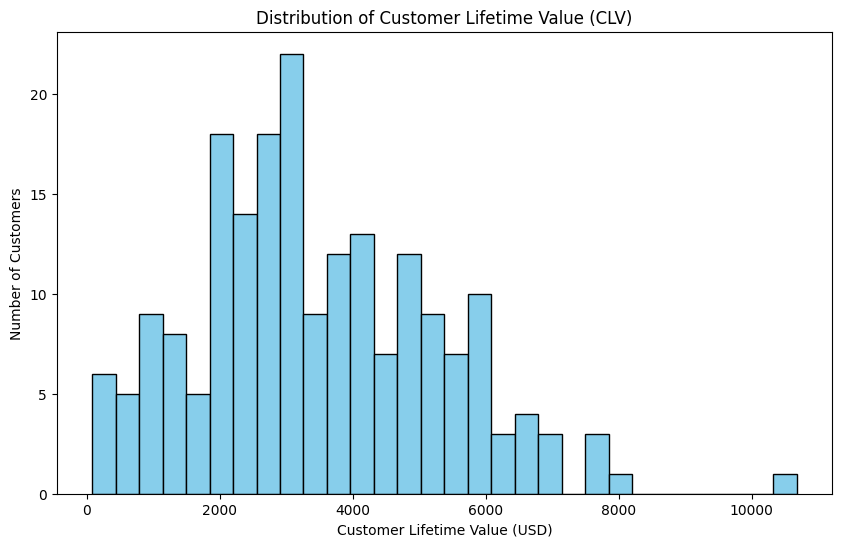

In [33]:
# Plotting the distribution of CLV
plt.figure(figsize=(10, 6))
plt.hist(clv_with_details['TotalValue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('Customer Lifetime Value (USD)')
plt.ylabel('Number of Customers')
plt.show()

### **4. Revenue Distribution**

##### 4.1.  Revenue Distribution by Product Category: A Visual Breakdown


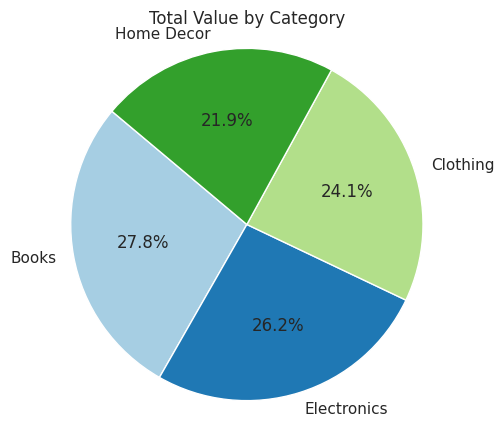

In [41]:
# Merge the datasets
# Join Transactions with Products on ProductID
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# Calculate total revenue for each product
#product_revenue = transactions_products.groupby(["ProductID", "ProductName"])["TotalValue"].sum().reset_index()
product_revenue = transactions_products.groupby(["Category"])["TotalValue"].sum().reset_index()
# Add percentage contribution to total revenue
total_revenue = product_revenue["TotalValue"].sum()
product_revenue["RevenueContribution (%)"] = (product_revenue["TotalValue"] / total_revenue) * 100

# Sort products by revenue contribution
product_revenue_sorted = product_revenue.sort_values(by="TotalValue", ascending=False)

# Pie chart for TotalValue by Category
plt.figure(figsize=(5, 5))

# Create the pie chart using the 'TotalValue' column
plt.pie(product_revenue_sorted['TotalValue'], labels=product_revenue_sorted['Category'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Set the title
plt.title('Total Value by Category')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 4.2.  Revenue Contribution by each Product



   ProductID               ProductName  TotalValue  RevenueContribution (%)
28      P029        TechPro Headphones    19513.80                 2.828105
78      P079            ActiveWear Rug    17946.91                 2.601018
47      P048          TechPro Cookbook    17905.20                 2.594973
19      P020         ActiveWear Jacket    15060.92                 2.182756
61      P062           HomeSense Novel    14592.24                 2.114831
58      P059           SoundWave Jeans    13947.20                 2.021346
38      P039        TechPro Smartwatch    13778.88                 1.996952
82      P083     ActiveWear Smartwatch    13671.60                 1.981404
18      P019     ComfortLiving Sweater    13487.95                 1.954788
40      P041  ComfortLiving Smartphone    13232.12                 1.917711


<ipython-input-71-845ad72aebd5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RevenueContribution (%)', y='ProductName', data=product_revenue_sorted.head(25), palette='viridis')


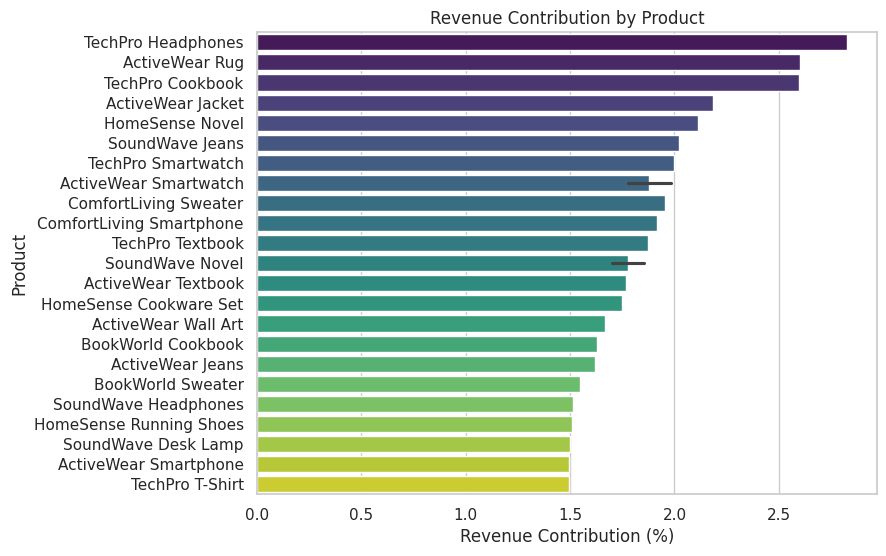

In [71]:

# Join Transactions with Products on ProductID
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# Calculate total revenue for each product
product_revenue = transactions_products.groupby(["ProductID", "ProductName"])["TotalValue"].sum().reset_index()

# Add percentage contribution to total revenue
total_revenue = product_revenue["TotalValue"].sum()
product_revenue["RevenueContribution (%)"] = (product_revenue["TotalValue"] / total_revenue) * 100

# Sort products by revenue contribution
product_revenue_sorted = product_revenue.sort_values(by="TotalValue", ascending=False)

# Display the top contributors
print(product_revenue_sorted.head(10))

# Optional: Save the result to a CSV file
#product_revenue_sorted.to_csv("Product_Revenue_Distribution.csv", index=False)


plt.figure(figsize=(8,6))
sns.barplot(x='RevenueContribution (%)', y='ProductName', data=product_revenue_sorted.head(25), palette='viridis')
plt.title('Revenue Contribution by Product')
plt.xlabel('Revenue Contribution (%)')
plt.ylabel('Product')
plt.show()



### **5. Transaction Value**

##### 5.1.  Average Transaction Value


In [80]:
# Calculate the total value of all transactions
total_value = transactions["TotalValue"].sum()

# Count the number of transactions
num_transactions = len(transactions)

# Calculate the average transaction value
average_transaction_value = total_value / num_transactions

# Print the result
print(f"Average Transaction Value: ${average_transaction_value:.2f}")

Average Transaction Value: $690.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### 5.2.  Average Order Value (AOV)

In [85]:
# Calculate the total revenue (sum of TotalValue) and number of orders per customer
customer_stats = transactions.groupby("CustomerID").agg(
    total_revenue=('TotalValue', 'sum'),
    num_orders=('TransactionID', 'nunique')
)

# Calculate Average Order Value (AOV) for each customer
customer_stats['AOV'] = customer_stats['total_revenue'] / customer_stats['num_orders']

# Calculate the overall average AOV (mean of all customers' AOVs)
overall_aov = customer_stats['AOV'].mean()

# Display the overall average AOV
print(f"Overall Average Order Value (AOV): ${overall_aov:.2f}")


Overall Average Order Value (AOV): $687.58


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **6. Transaction Timing Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


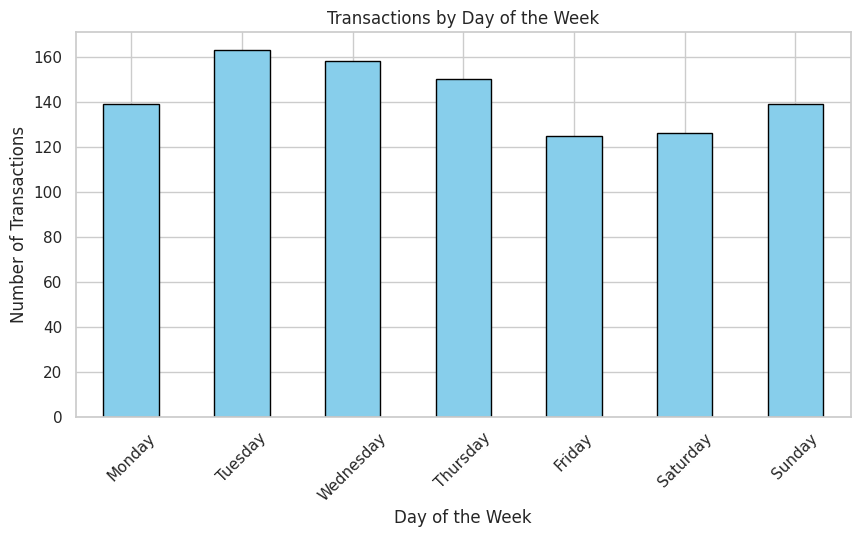

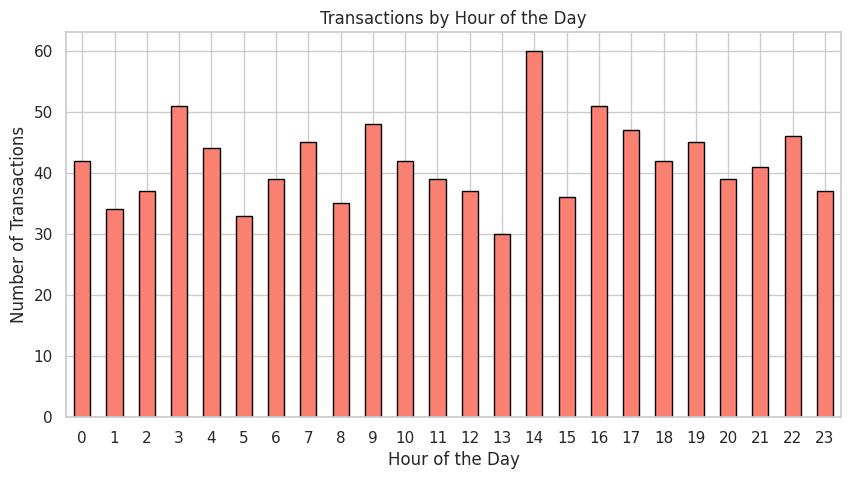

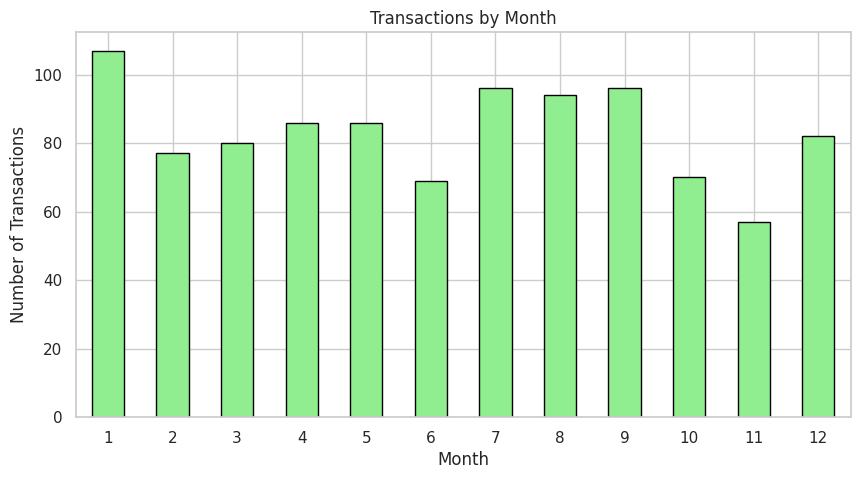

Laptop not found in the dataset.


In [83]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract features: day of the week, hour of the day, and month
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.day_name()  # e.g., Monday, Tuesday
transactions['HourOfDay'] = transactions['TransactionDate'].dt.hour  # Hour of the day (0-23)
transactions['Month'] = transactions['TransactionDate'].dt.month  # Month (1-12)

# Merge with product data to get product categories
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# --- Transaction Timing Analysis ---
# 1. Total transactions by day of the week
day_of_week = transactions.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# 2. Total transactions by hour of the day
hour_of_day = transactions.groupby('HourOfDay').size()

# 3. Total transactions by month
month = transactions.groupby('Month').size()

# --- Plotting the results ---
# Plot transaction count by day of the week
plt.figure(figsize=(10, 5))
day_of_week.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Transactions by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# Plot transaction count by hour of the day
plt.figure(figsize=(10, 5))
hour_of_day.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Transactions by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# Plot transaction count by month
plt.figure(figsize=(10, 5))
month.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

# --- Product-Specific Timing ---
# Analyze which products are bought the most during different times
product_time_analysis = transactions_products.groupby(['ProductName', 'HourOfDay']).size().unstack().fillna(0)

# Plot time-based product purchase behavior for a specific product
product_name = 'Laptop'  # Example: You can change this to any product name you are interested in
if product_name in product_time_analysis.index:
    product_time_analysis.loc[product_name].plot(kind='line', color='purple', marker='o')
    plt.title(f"Transaction Timing for {product_name}")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Number of Transactions")
    plt.show()
else:
    print(f"{product_name} not found in the dataset.")
